## Bookify: The Ultimate Book Recommendation Application With Data-Driven Intelligence

### Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
books = pd.read_csv('Dataset/Books.csv')
users = pd.read_csv('Dataset/Users.csv')
ratings = pd.read_csv('Dataset/Ratings.csv')

In [4]:
pd.set_option('display.max_colwidth', -1)

### Books Data

In [5]:
books.head()

ISBN  \
0  0195153448   
1  0002005018   
2  0060973129   
3  0374157065   
4  0393045218   

                                                                                           Book-Title  \
0  Classical Mythology                                                                                  
1  Clara Callan                                                                                         
2  Decision in Normandy                                                                                 
3  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It   
4  The Mummies of Urumchi                                                                               

            Book-Author Year-Of-Publication                   Publisher  \
0  Mark P. O. Morford    2002                Oxford University Press      
1  Richard Bruce Wright  2001                HarperFlamingo Canada        
2  Carlo D'Este          1991                HarperPerennial              
3  Gina Bari Kolata      1999                Farrar Straus Giroux         
4  E. J. W. Barber       1999                W. W. Norton &amp; Company   

                                                    Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg   
1  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg   
2  http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg   
3  http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg   
4  http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg   
2  http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg   
3  http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg   
4  http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg   

                                                    Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg  
1  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg  
2  http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg  
3  http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg  
4  http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg

### Users Data

In [6]:
users.head()

User-ID                            Location   Age
0  1        nyc, new york, usa                 NaN  
1  2        stockton, california, usa           18.0
2  3        moscow, yukon territory, russia    NaN  
3  4        porto, v.n.gaia, portugal           17.0
4  5        farnborough, hants, united kingdom NaN

### Ratings Data

In [7]:
ratings.head()

User-ID        ISBN  Book-Rating
0  276725   034545104X  0          
1  276726   0155061224  5          
2  276727   0446520802  0          
3  276729   052165615X  3          
4  276729   0521795028  6

In [8]:
# Checking the dimensions of the datasets

print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### Data preprocessing

#### 1. Books Dataset Pre-processing

In [9]:
# Checking for null values

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
# Checking for duplicates

books.duplicated().sum()

0

In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [12]:
# getting no.of unique value from 'Book-Author' feature

books['Book-Author'].nunique()

102023

In [13]:
# getting no.of unique value from 'Publisher' feature

books['Publisher'].nunique()

16807

In [14]:
# getting no.of unique value from 'ISBN' feature

books['ISBN'].nunique()

271360

In [15]:
# getting no.of unique value from 'Year-Of-Publication' feature

books['Year-Of-Publication'].nunique()

202

In [16]:
# getting unique value from 'Year-Of-Publication' feature

books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [17]:
# from above we can observe that 'DK Publishing Inc','Gallimard' have been placed in incorrect column

books[books['Year-Of-Publication'].isin(['DK Publishing Inc','Gallimard'])]

ISBN  \
209538  078946697X   
220731  2070426769   
221678  0789466953   

                                                                                                         Book-Title  \
209538  DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"          
220731  Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"                                      
221678  DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"   

       Book-Author Year-Of-Publication  \
209538  2000        DK Publishing Inc    
220731  2003        Gallimard            
221678  2000        DK Publishing Inc    

                                                           Publisher  \
209538  http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg   
220731  http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg   
221678  http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg   

                                                         Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg   
220731  http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg   
221678  http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg   

                                                         Image-URL-M  \
209538  http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg   
220731  http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg   
221678  http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg   

       Image-URL-L  
209538  NaN         
220731  NaN         
221678  NaN

In [18]:
# Thus we shift the respective rows and place them in the right columns

books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'
books.at[209538 ,'Image-URL-S'] = 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'
books.at[209538 ,'Image-URL-M'] = 'http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg'
books.at[209538 ,'Image-URL-L'] = 'http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[221678 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[221678 ,'Book-Author'] = 'James Buckley'
books.at[221678 ,'Image-URL-S'] = 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'
books.at[221678 ,'Image-URL-M'] = 'http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg'
books.at[221678 ,'Image-URL-L'] = 'http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[220731 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[220731 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.at[220731 ,'Image-URL-S'] = 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg'
books.at[220731 ,'Image-URL-M'] = 'http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg'
books.at[220731 ,'Image-URL-L'] = 'http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg'

In [19]:
# changing dtype of year of publication

books['Year-Of-Publication']=books['Year-Of-Publication'].astype(int)

In [20]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [21]:
# something is off about years of publication like:

books[(books['Year-Of-Publication'] > 0) & (books['Year-Of-Publication'] < 1800)]

ISBN                        Book-Title     Book-Author  \
227531  9643112136  Dalan-i bihisht (Dastan-i Irani)  Nazi Safavi      
253750  964442011X  Tasht-i khun                      IsmaÂ°il Fasih   

        Year-Of-Publication            Publisher  \
227531  1378                 Intisharat-i Quqnus   
253750  1376                 Nashr-i Alburz        

                                                         Image-URL-S  \
227531  http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg   
253750  http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg   

                                                         Image-URL-M  \
227531  http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg   
253750  http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg   

                                                         Image-URL-L  
227531  http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg  
253750  http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg

In [22]:
# replacing with correct  values

books.loc[books.ISBN=='9643112136','Year-Of-Publication'] = 2010
books.loc[books.ISBN=='964442011X', 'Year-Of-Publication'] = 1991

In [23]:
#Sustituting np.Nan in rows with year=0 or  greater than the current year,2022.

books.loc[(books['Year-Of-Publication'] > 2022) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN


In [25]:
# replacing NaN values with mode value of Year-Of-Publication

books['Year-Of-Publication'].fillna(books['Year-Of-Publication'].mode()[0], inplace=True)

In [26]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [328]:
# Checking  for  null value in book author

books[books['Book-Author'].isna()]

ISBN                                                Book-Title  \
187689  9627982032  The Credit Suisse Guide to Managing Your Personal Wealth   

       Book-Author  Year-Of-Publication                       Publisher  \
187689  NaN         1995                 Edinburgh Financial Publishing   

                                                         Image-URL-S  \
187689  http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg   

                                                         Image-URL-M  \
187689  http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg   

                                                         Image-URL-L  
187689  http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg

In [329]:
books['Book-Author'].fillna('Not mentioned', inplace=True)

In [330]:
# Checking  for  null value in book author

books[books['Publisher'].isna()]

ISBN       Book-Title      Book-Author  Year-Of-Publication  \
128890  193169656X  Tyrant Moon      Elaine Corvidae  2002                  
129037  1931696993  Finders Keepers  Linnea Sinclair  2001                  

       Publisher  \
128890  NaN        
129037  NaN        

                                                         Image-URL-S  \
128890  http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg   
129037  http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg   

                                                         Image-URL-M  \
128890  http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg   
129037  http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg   

                                                         Image-URL-L  
128890  http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg  
129037  http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg

In [331]:
books['Publisher'].fillna('Not mentioned', inplace=True)

In [332]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

#### 2. Users Dataset Pre-processing

In [333]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [334]:
users.duplicated().sum()

0

In [335]:
# Checking null values

users.isna().sum()

User-ID     0     
Location    0     
Age         110762
dtype: int64

In [336]:
# checking percentage of null values

users.isnull().sum()/len(users)*100

User-ID     0.000000 
Location    0.000000 
Age         39.719857
dtype: float64

In [337]:
# summarizing data in 'Age' column

users['Age'].describe()

count    168096.000000
mean     34.751434    
std      14.428097    
min      0.000000     
25%      24.000000    
50%      32.000000    
75%      44.000000    
max      244.000000   
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

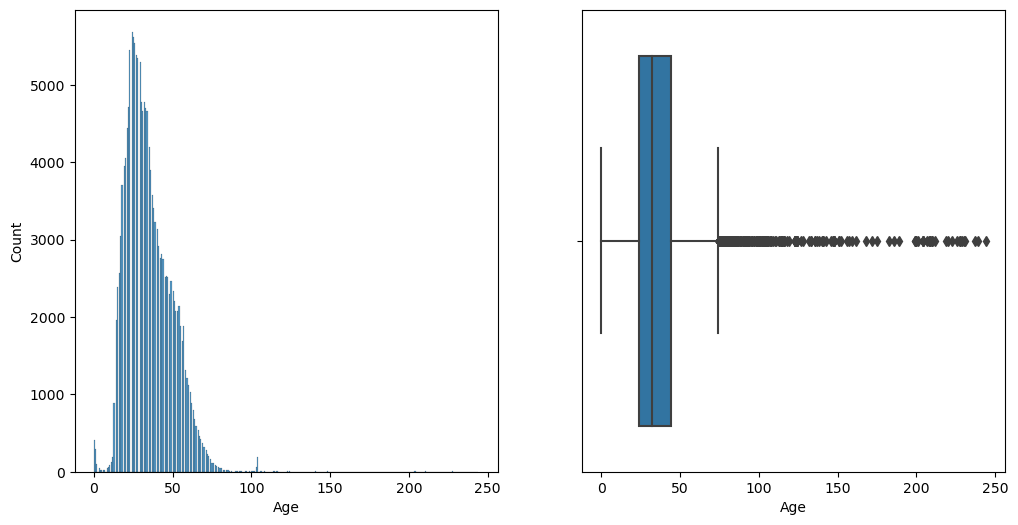

In [338]:
#Histogram showing distribution of ages

fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=users)



# boxplot of Age column

plt.subplot(1,2,2)
sns.boxplot(x='Age',data=users)

    Most of the users are from the age group 25-50
    
    It is highly unlikely to have users under the age of 4 and above 100. In this case they are the outliers so let's         replace these values with np.nan

In [339]:
# Handling outliers

users.loc[(users['Age'] > 100) | (users['Age'] < 5),'Age'] = np.nan

In [340]:
users['Age'].fillna(users['Age'].mode()[0], inplace=True)

In [341]:
users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [342]:
#changing datatype to int

users['Age'] = users['Age'].astype(int)       

#### 3. Ratings Dataset Pre-processing

In [343]:
ratings.duplicated().sum()

0

In [344]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [345]:
# Checking null values

ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [346]:
# Checking unique values in the 'Book-Rating' feature

ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

### Exporting cleaned data

In [347]:
users.to_csv('C:/Users/pppon/BRS_FINAL/Cleaned Data/cleaned_users.csv', index=False)
books.to_csv('C:/Users/pppon/BRS_FINAL/Cleaned Data/cleaned_books.csv', index=False)
ratings.to_csv('C:/Users/pppon/BRS_FINAL/Cleaned Data/cleaned_ratings.csv', index=False)

## Data Visualization and Analysis

## 1. Books dataset

### Analysis no. 1 - Author with highest no.of books

In [348]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: int32(1), object(7)
memory usage: 15.5+ MB


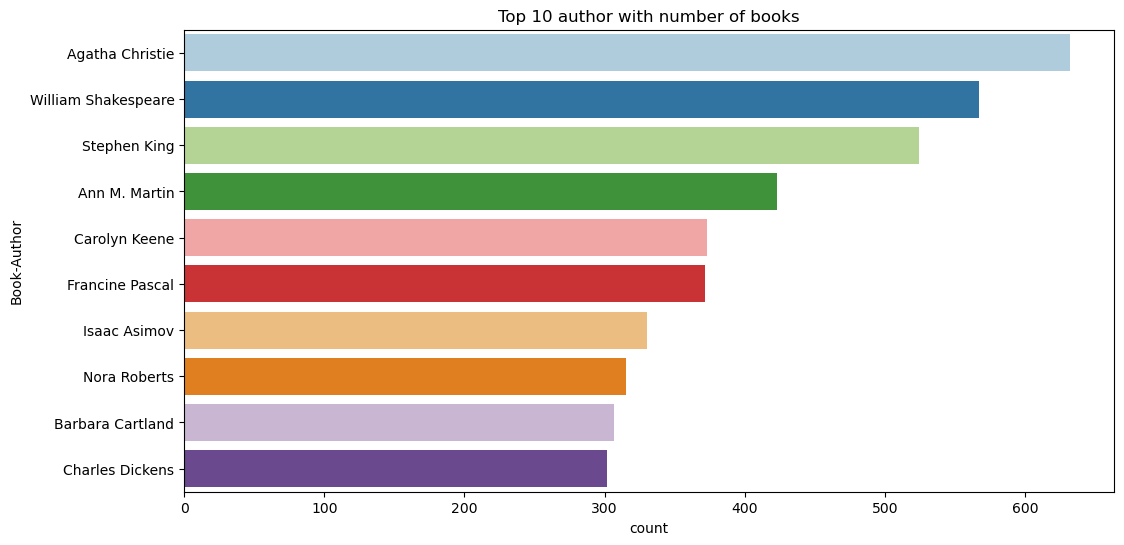

In [349]:
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data=books,order=books['Book-Author'].value_counts().index[0:10])
plt.title("Top 10 author with number of books")
plt.show()

    Agatha Christie is leading at top with more than 600  counts  as  she  has most  number  of books written as compared to  others, followed by William Shakespeare.

### Analysis no. 2 - Top publishers

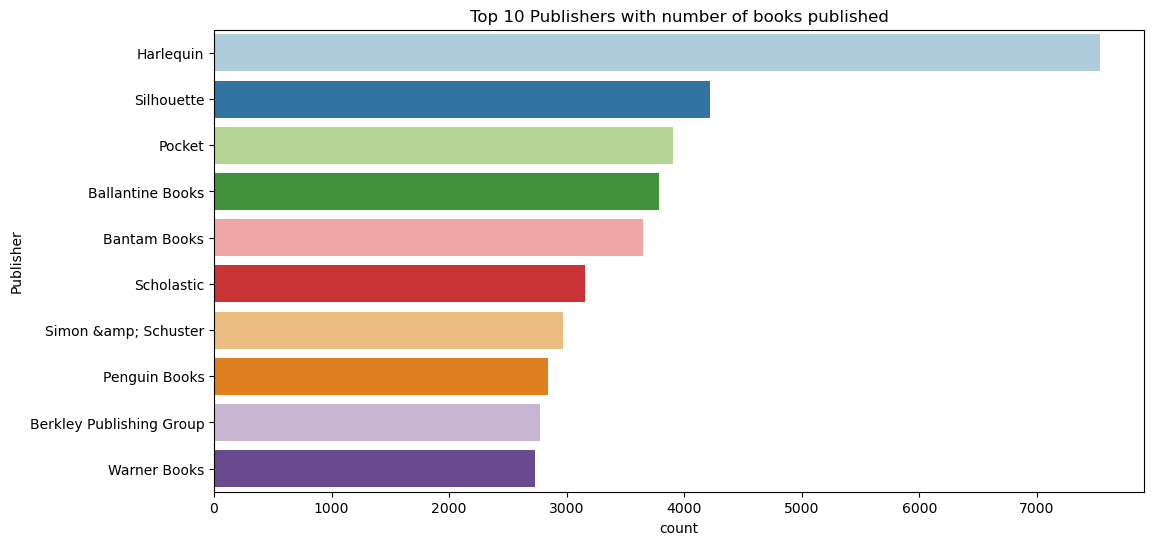

In [350]:
plt.figure(figsize=(12,6))
sns.countplot(y="Publisher",palette = 'Paired', data=books,order=books['Publisher'].value_counts().index[0:10])
plt.title("Top 10 Publishers with number of books published")
plt.show()

    Harlequin has most number of books published, followed by Silhouette. 

### Analysis no.3 - Number of Books published on yearly basis

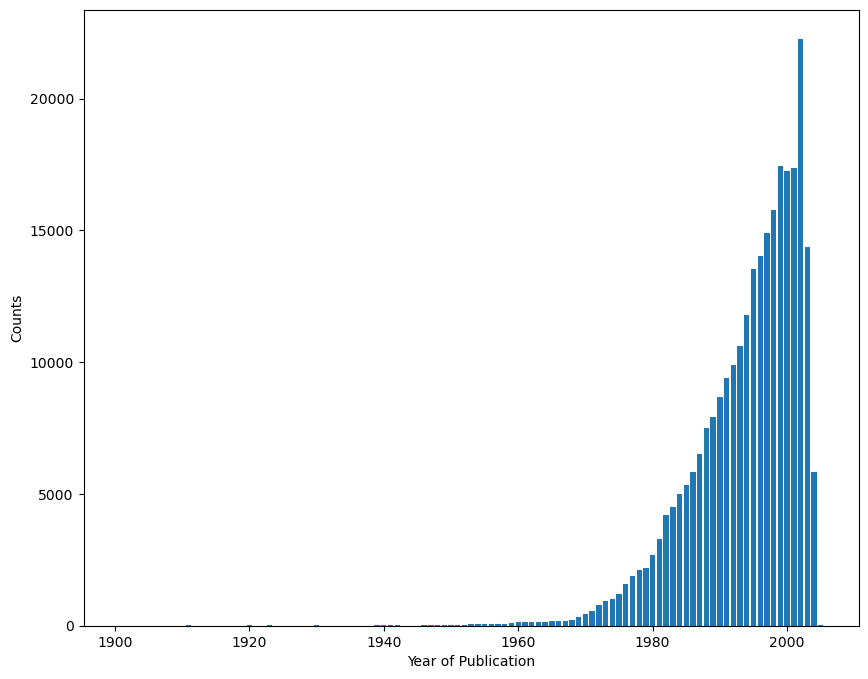

In [351]:
year = books['Year-Of-Publication'].value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('Counts')
plt.show()

    Most no.of books were published in the year 2002

    The book industry boomed from 1980's and it was at its peak around the  year  2000,  it might because people started to understand the importance of books and gradually started to implement productive habits in their life.

## 2. Users data Dataset

### Analysis no.4 - Age wise distributions of users

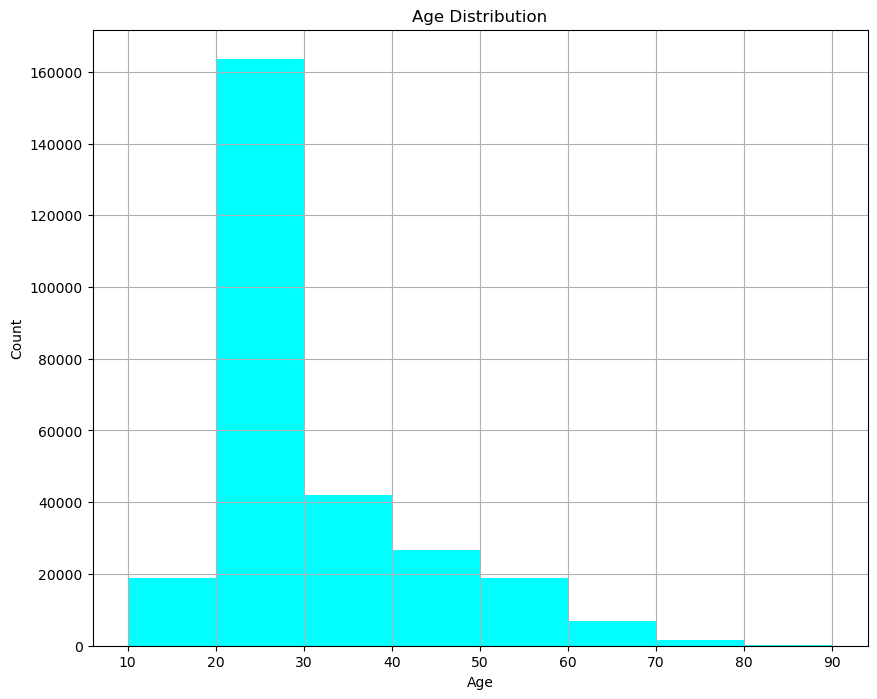

In [352]:
plt.figure(figsize=(10,8))
users.Age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

    Most of the users are 20 - 30 years old which represents the youth

## 3. Ratings Dataset

In [353]:
explicit_rating=ratings[ratings['Book-Rating'] != 0]

In [354]:
# Merging  all three datasets
# for the rating dataset, we are only taking the explicit rating dataset

df = pd.merge(books, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, users, on='User-ID', how='inner')

In [355]:
# shape of the merged dataframe 'df'

df.shape

(383842, 12)

In [356]:
# displaying the top 3 rows of df

df.head(3)

ISBN                               Book-Title           Book-Author  \
0  0002005018  Clara Callan                             Richard Bruce Wright   
1  074322678X  Where You'll Find Me: And Other Stories  Ann Beattie            
2  0887841740  The Middle Stories                       Sheila Heti            

   Year-Of-Publication              Publisher  \
0  2001                 HarperFlamingo Canada   
1  2002                 Scribner                
2  2004                 House of Anansi Press   

                                                    Image-URL-S  \
0  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg   
1  http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg   
2  http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg   
2  http://images.amazon.com/images/P/0887841740.01.MZZZZZZZ.jpg   

                                                    Image-URL-L  User-ID  \
0  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg  8         
1  http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg  8         
2  http://images.amazon.com/images/P/0887841740.01.LZZZZZZZ.jpg  8         

   Book-Rating                  Location  Age  
0  5            timmins, ontario, canada  24   
1  5            timmins, ontario, canada  24   
2  5            timmins, ontario, canada  24

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 383842 non-null  object
 1   Book-Title           383842 non-null  object
 2   Book-Author          383842 non-null  object
 3   Year-Of-Publication  383842 non-null  int32 
 4   Publisher            383842 non-null  object
 5   Image-URL-S          383842 non-null  object
 6   Image-URL-M          383842 non-null  object
 7   Image-URL-L          383842 non-null  object
 8   User-ID              383842 non-null  int64 
 9   Book-Rating          383842 non-null  int64 
 10  Location             383842 non-null  object
 11  Age                  383842 non-null  int32 
dtypes: int32(2), int64(2), object(8)
memory usage: 35.1+ MB


### Analysis No. 5 - Rating distribution

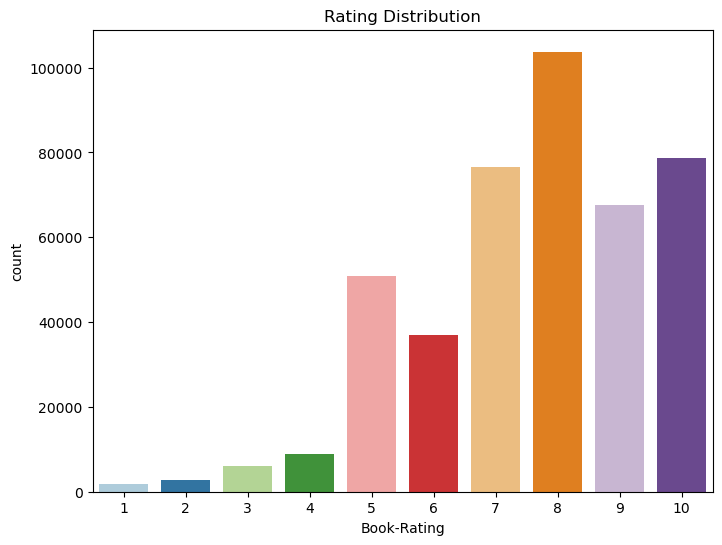

In [358]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating",palette = 'Paired',data = explicit_rating)
plt.title('Rating Distribution')
plt.show()

    Above countplot indicates that higher ratings are more common amongst users and rating 8 has been rated highest number  of times.

### Analysis No. 6 - Top 10 highest rated books

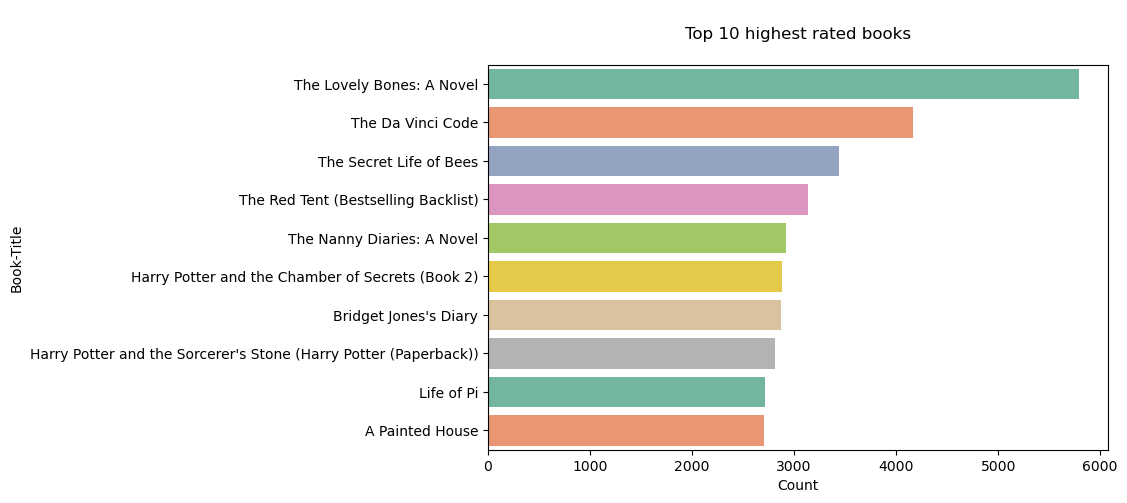

In [359]:
# top 10 highest rated books

popular = df.groupby('Book-Title')['Book-Rating'].sum().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
popular.columns = ['Book-Title', 'Count']

plt.figure(figsize=[8, 5])
plt.title('\nTop 10 highest rated books\n')
sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set2')
plt.show()

    The book which has been rated by most number of users is 'The Lovely Bones'

### Analysis No. 7 - Top 10 highest rated authors

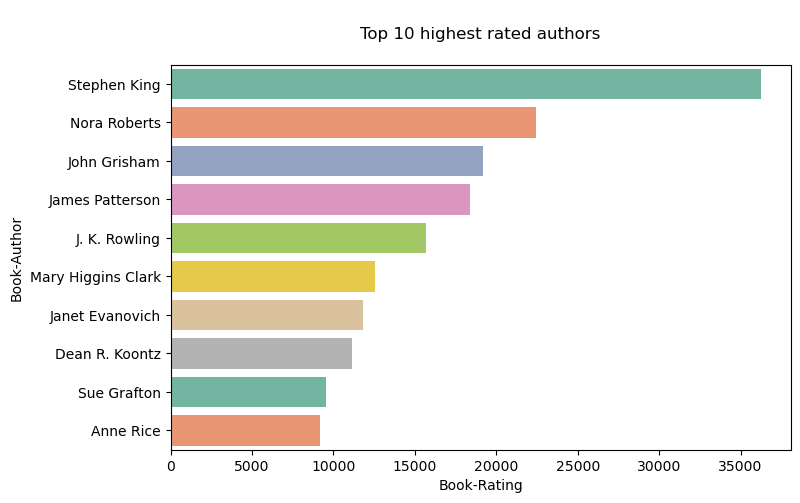

In [360]:
# Top 10 highest rated authors

author = df.groupby('Book-Author')['Book-Rating'].sum().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.title('\nTop 10 highest rated authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')     
plt.show()

    Top book author with respect to the number of ratings is Stephen King

# Recommendation systems

## A] Popularity based filtering 

### 1. Using average rating - Top 50 books in whole collection

In [361]:
# merging rating and books

ratings_with_name = ratings.merge(books,on='ISBN')

In [362]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [363]:
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

Book-Title  \
0        A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)   
1        Always Have Popsicles                                                                                       
2        Apple Magic (The Collector's series)                                                                        
3        Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                        
4        Beyond IBM: Leadership Marketing and Finance for the 1990s                                                  
...                                                             ...                                                  
241066  Ã?Â?lpiraten.                                                                                                
241067  Ã?Â?rger mit Produkt X. Roman.                                                                               
241068  Ã?Â?sterlich leben.                                                                                          
241069  Ã?Â?stlich der Berge.                                                                                        
241070  Ã?Â?thique en toc                                                                                            

        num_ratings  
0       4            
1       1            
2       1            
3       1            
4       1            
...    ..            
241066  2            
241067  4            
241068  1            
241069  3            
241070  2            

[241071 rows x 2 columns]

In [364]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_rating_df

Book-Title  \
0        A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)   
1        Always Have Popsicles                                                                                       
2        Apple Magic (The Collector's series)                                                                        
3        Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                        
4        Beyond IBM: Leadership Marketing and Finance for the 1990s                                                  
...                                                             ...                                                  
241066  Ã?Â?lpiraten.                                                                                                
241067  Ã?Â?rger mit Produkt X. Roman.                                                                               
241068  Ã?Â?sterlich leben.                                                                                          
241069  Ã?Â?stlich der Berge.                                                                                        
241070  Ã?Â?thique en toc                                                                                            

        avg_ratings  
0       2.250000     
1       0.000000     
2       0.000000     
3       8.000000     
4       0.000000     
...          ...     
241066  0.000000     
241067  5.250000     
241068  7.000000     
241069  2.666667     
241070  4.000000     

[241071 rows x 2 columns]

In [365]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')

In [366]:
popular_df = popular_df[popular_df['num_ratings']>=250 ].sort_values('avg_ratings',ascending=False).head(50)

In [367]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]
popular_df.reset_index(inplace=True)
popular_df

index  \
0   0       
1   3       
2   5       
3   9       
4   13      
5   16      
6   17      
7   26      
8   28      
9   39      
10  47      
11  53      
12  55      
13  62      
14  63      
15  72      
16  73      
17  78      
18  84      
19  85      
20  88      
21  89      
22  98      
23  100     
24  103     
25  116     
26  117     
27  123     
28  124     
29  126     
30  130     
31  133     
32  135     
33  137     
34  139     
35  140     
36  141     
37  147     
38  149     
39  157     
40  163     
41  166     
42  173     
43  175     
44  177     
45  182     
46  186     
47  192     
48  194     
49  195     

                                                                   Book-Title  \
0   Harry Potter and the Prisoner of Azkaban (Book 3)                           
1   Harry Potter and the Goblet of Fire (Book 4)                                
2   Harry Potter and the Sorcerer's Stone (Book 1)                              
3   Harry Potter and the Order of the Phoenix (Book 5)                          
4   Harry Potter and the Chamber of Secrets (Book 2)                            
5   The Hobbit : The Enchanting Prelude to The Lord of the Rings                
6   The Fellowship of the Ring (The Lord of the Rings, Part 1)                  
7   Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))            
8   The Two Towers (The Lord of the Rings, Part 2)                              
9   To Kill a Mockingbird                                                       
10  The Da Vinci Code                                                           
11  The Five People You Meet in Heaven                                          
12  The Catcher in the Rye                                                      
13  The Lovely Bones: A Novel                                                   
14  1984                                                                        
15  Prodigal Summer: A Novel                                                    
16  Neverwhere                                                                  
17  The Secret Life of Bees                                                     
18  Stupid White Men ...and Other Sorry Excuses for the State of the Nation!    
19  Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson   
20  The Red Tent (Bestselling Backlist)                                         
21  The Hitchhiker's Guide to the Galaxy                                        
22  Nickel and Dimed: On (Not) Getting By in America                            
23  Into the Wild                                                               
24  Fahrenheit 451                                                              
25  Girl with a Pearl Earring                                                   
26  Outlander                                                                   
27  Where the Heart Is (Oprah's Book Club (Paperback))                          
28  Seabiscuit: An American Legend                                              
29  Life of Pi                                                                  
30  The Bean Trees                                                              
31  A Child Called \It\": One Child's Courage to Survive"                       
32  ANGELA'S ASHES                                                              
33  Good in Bed                                                                 
34  Fast Food Nation: The Dark Side of the All-American Meal                    
35  American Gods                                                               
36  Skipping Christmas                                                          
37  Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)           
38  The Golden Compass (His Dark Materials, Book 1)                             
39  The Color Purple                                                            
40  Silence of the 

In [368]:
popular_df.shape

(50, 6)

### 2. Books popular yearly 

In [369]:
# merging rating and books

ratings_with_name = ratings.merge(books,on='ISBN')

In [370]:
num_rating_df = ratings_with_name.groupby('ISBN').count()['Book-Rating'].reset_index()

In [371]:
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)

In [372]:
avg_rating_df = ratings_with_name.groupby('ISBN').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)

In [373]:
popular_df_y = num_rating_df.merge(avg_rating_df,on='ISBN')
popular_df_y = pd.merge(popular_df_y, books, on='ISBN')

In [374]:
popular_df_y=popular_df_y.sort_values('avg_ratings', ascending=False)

In [375]:
years = set()
indices = []
for ind, row in popular_df_y.iterrows():
    if row['Year-Of-Publication'] in years:
        indices.append(ind)
    else:
        years.add(row['Year-Of-Publication'])

popular_df_y = popular_df_y.drop(indices)
popular_df_y = popular_df_y.drop(['num_ratings','avg_ratings'], axis = 1)
popular_df_y = popular_df_y.sort_values('Year-Of-Publication')

In [376]:
popular_df_y

ISBN  \
166739  0781228956   
166743  0781268001   
217769  1551103982   
140778  0671825356   
190035  0841499306   
...            ...   
269406  9643112136   
72582   0394172116   
29005   0307124533   
146139  068107468X   
124106  0590085417   

                                                                    Book-Title  \
166739  Complete Works 10 Volumes [2,6,7,8,9] (Notable American Authors)         
166743  Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS American Literature)         
217769  The Cycling Adventures of Coconut Head: A North American Odyssey         
140778  W D HSE PLANTS                                                           
190035  Charlotte Bronte, George Eliot and Jane Austin: Studies in Their Works   
...                                                                        ...   
269406  Dalan-i bihisht (Dastan-i Irani)                                         
72582   Monkey (An Evergreen Book, E-112)                                        
29005   Owl's Amazing but True No. 2                                             
146139  Edgar Allen Poe Collected Poems                                          
124106  Heidi                                                                    

                Book-Author  Year-Of-Publication                   Publisher  \
166739  Benjamin Franklin    1806                 Reprint Services Corp        
166743  Silas Weir Mitchell  1897                 Reprint Services Corp        
217769  Ted Schredd          1900                 Graphic Arts Center Pub Co   
140778  Jd Hersey            1901                 Simon &amp; Schuster         
190035  Henry H. Bonnell     1902                 Folcroft Library Editions    
...                  ...      ...                                       ...    
269406  Nazi Safavi          2010                 Intisharat-i Quqnus          
72582   Cheng-En Wu          2011                 Grove Press                  
29005   Owl Magazine         2012                 Golden Books                 
146139  Edgar Allan Poe      2020                 Bausch &amp; Lombard         
124106  Johanna Spyri        2021                 Scholastic                   

                                                         Image-URL-S  \
166739  http://images.amazon.com/images/P/0781228956.01.THUMBZZZ.jpg   
166743  http://images.amazon.com/images/P/0781268001.01.THUMBZZZ.jpg   
217769  http://images.amazon.com/images/P/1551103982.01.THUMBZZZ.jpg   
140778  http://images.amazon.com/images/P/0671825356.01.THUMBZZZ.jpg   
190035  http://images.amazon.com/images/P/0841499306.01.THUMBZZZ.jpg   
...                                                              ...   
269406  http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg   
72582   http://images.amazon.com/images/P/0394172116.01.THUMBZZZ.jpg   
29005   http://images.amazon.com/images/P/0307124533.01.THUMBZZZ.jpg   
146139  http://images.amazon.com/images/P/068107468X.01.THUMBZZZ.jpg   
124106  http://images.amazon.com/images/P/0590085417.01.THUMBZZZ.jpg   

                                                         Image-URL-M  \
166739  http://images.amazon.com/images/P/0781228956.01.MZZZZZZZ.jpg   
166743  http://images.amazon.com/images/P/0781268001.01.MZZZZZZZ.jpg   
217769  http://images.amazon.com/images/P/1551103982.01.MZZZZZZZ.jpg   
140778  http://images.amazon.com/images/P/0671825356.01.MZZZZZZZ.jpg   
190035  http://images.amazon.com/images/P/0841499306.01.MZZZZZZZ.jpg   
...                                                              ...   
269406  http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg   
72582   http://images.amazon.com/images/P/0394172116.01.MZZZZZZZ.jpg   
29005   http://images.amazon.com/images/P/0307124533.01.MZZZZZZZ.jpg   
146139  http://images.amazon.com/images/P/068107468X.01.MZZZZZZZ.jpg   
124106  http://images.amazon.com/images/P/0590085417.01.MZZZZZZZ.jpg   

                                                         Image-URL-L  
16

## B] Recommendations based on correlations

We use Pearsons’R correlation coefficient to measure the linear correlation between two variables, in our case, the ratings for two books.

First, we need to find out the average rating, and the number of ratings each book received.

In [377]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

Book-Rating  ratingCount
ISBN                                
0971880107  1.019584     2502       
0316666343  4.468726     1295       
0385504209  4.652322     883        
0060928336  3.448087     732        
0312195516  4.334716     723

In this data set, the book that received the most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [378]:
# Considering only those users which have rated atleast 200 books

counts1 = ratings['User-ID'].value_counts()

ratings_cor = ratings[ratings['User-ID'].isin(counts1[counts1 >= 200].index)]



# Considering only those books which have atleast 100 ratings on them

counts = ratings['Book-Rating'].value_counts()

ratings_cor = ratings_cor[ratings_cor['Book-Rating'].isin(counts[counts >= 100].index)]

In [379]:
# We convert the ratings table to a 2D matrix. The matrix will be sparse because not every user rated every book.

ratings_pivot = ratings_cor.pivot(index='User-ID', columns='ISBN')['Book-Rating']
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN      0330299891   0375404120   0586045007   9022906116   9032803328  \
User-ID                                                                    
254     NaN          NaN          NaN          NaN          NaN            
2276    NaN          NaN          NaN          NaN          NaN            
2766    NaN          NaN          NaN          NaN          NaN            
2977    NaN          NaN          NaN          NaN          NaN            
3363    NaN          NaN          NaN          NaN          NaN            

ISBN      9044922564   9044922572   9044922718   9044923161   904492401X  ...  \
User-ID                                                                   ...   
254     NaN          NaN          NaN          NaN          NaN           ...   
2276    NaN          NaN          NaN          NaN          NaN           ...   
2766    NaN          NaN          NaN          NaN          NaN           ...   
2977    NaN          NaN          NaN          NaN          NaN           ...   
3363    NaN          NaN          NaN          NaN          NaN           ...   

ISBN     UNGRANDHOMMED  X000000000  YOUTELLEM,AND  ZR903CX0003  \
User-ID                                                          
254     NaN            NaN         NaN            NaN            
2276    NaN            NaN         NaN            NaN            
2766    NaN            NaN         NaN            NaN            
2977    NaN            NaN         NaN            NaN            
3363    NaN            NaN         NaN            NaN            

ISBN     \0432534220\""  \2842053052\""  b00005wz75  cn108465  cn113107  \
User-ID                                                                   
254     NaN             NaN             NaN         NaN       NaN         
2276    NaN             NaN             NaN         NaN       NaN         
2766    NaN             NaN             NaN         NaN       NaN         
2977    NaN             NaN             NaN         NaN       NaN         
3363    NaN             NaN             NaN         NaN       NaN         

ISBN     Ô½crosoft  
User-ID             
254     NaN         
2276    NaN         
2766    NaN         
2977    NaN         
3363    NaN         

[5 rows x 207699 columns]

In [380]:
# Testing 1

In [406]:
# Let’s find out which books are correlated with the 2nd most rated book “The Lovely Bones: A Novel”, '0316666343'.

bones_ratings = ratings_pivot['0316666343']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
l=corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

In [407]:
books_corr_to_bones = pd.DataFrame(list(l.index), 
                                  index=np.arange(10), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, books, on='ISBN')
corr_books

ISBN                                          Book-Title  \
0  0316666343  The Lovely Bones: A Novel                            
1  0312291639  The Nanny Diaries: A Novel                           
2  0316601950  The Pilot's Wife : A Novel                           
3  0446610038  1st to Die: A Novel                                  
4  0446672211  Where the Heart Is (Oprah's Book Club (Paperback))   
5  0385265700  The Book of Ruth (Oprah's Book Club (Paperback))     
6  0345342968  Fahrenheit 451                                       
7  0060930535  The Poisonwood Bible: A Novel                        
8  0375707972  The Reader                                           
9  0684872153  Angela's Ashes (MMP) : A Memoir                      

          Book-Author  Year-Of-Publication             Publisher  \
0  Alice Sebold        2002                 Little, Brown          
1  Emma McLaughlin     2003                 St. Martin's Griffin   
2  Anita Shreve        1999                 Back Bay Books         
3  James Patterson     2002                 Warner Vision          
4  Billie Letts        1998                 Warner Books           
5  Jane Hamilton       1990                 Anchor                 
6  RAY BRADBURY        1987                 Del Rey                
7  Barbara Kingsolver  1999                 Perennial              
8  Bernhard Schlink    1999                 Vintage Books USA      
9  Frank McCourt       1999                 Scribner               

                                                    Image-URL-S  \
0  http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg   
1  http://images.amazon.com/images/P/0312291639.01.THUMBZZZ.jpg   
2  http://images.amazon.com/images/P/0316601950.01.THUMBZZZ.jpg   
3  http://images.amazon.com/images/P/0446610038.01.THUMBZZZ.jpg   
4  http://images.amazon.com/images/P/0446672211.01.THUMBZZZ.jpg   
5  http://images.amazon.com/images/P/0385265700.01.THUMBZZZ.jpg   
6  http://images.amazon.com/images/P/0345342968.01.THUMBZZZ.jpg   
7  http://images.amazon.com/images/P/0060930535.01.THUMBZZZ.jpg   
8  http://images.amazon.com/images/P/0375707972.01.THUMBZZZ.jpg   
9  http://images.amazon.com/images/P/0684872153.01.THUMBZZZ.jpg   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/0312291639.01.MZZZZZZZ.jpg   
2  http://images.amazon.com/images/P/0316601950.01.MZZZZZZZ.jpg   
3  http://images.amazon.com/images/P/0446610038.01.MZZZZZZZ.jpg   
4  http://images.amazon.com/images/P/0446672211.01.MZZZZZZZ.jpg   
5  http://images.amazon.com/images/P/0385265700.01.MZZZZZZZ.jpg   
6  http://images.amazon.com/images/P/0345342968.01.MZZZZZZZ.jpg   
7  http://images.amazon.com/images/P/0060930535.01.MZZZZZZZ.jpg   
8  http://images.amazon.com/images/P/0375707972.01.MZZZZZZZ.jpg   
9  http://images.amazon.com/images/P/0684872153.01.MZZZZZZZ.jpg   

                                                    Image-URL-L  
0  http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg  
1  http://images.amazon.com/images/P/0312291639.01.LZZZZZZZ.jpg  
2  http://images.amazon.com/images/P/0316601950.01.LZZZZZZZ.jpg  
3  http://images.amazon.com/images/P/0446610038.01.LZZZZZZZ.jpg  
4  http://images.amazon.com/images/P/0446672211.01.LZZZZZZZ.jpg  
5  http://images.amazon.com/images/P/0385265700.01.LZZZZZZZ.jpg  
6  http://images.amazon.com/images/P/0345342968.01.LZZZZZZZ.jpg  
7  http://images.amazon.com/images/P/0060930535.01.LZZZZZZZ.jpg  
8  http://images.amazon.com/images/P/0375707972.01.LZZZZZZZ.jpg  
9  http://images.amazon.com/images/P/0684872153.01.LZZZZZZZ.jpg

In [383]:
# Testing 2

In [384]:
# Let’s find out which books are correlated with “The Green Mile: Coffey's Hands (Green Mile Series)”, '0451190548'.

bones_ratings = ratings_pivot['0451190548']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
l1=corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

In [385]:
books_corr_to_bones = pd.DataFrame(list(l1.index), 
                                  index=np.arange(10), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, books, on='ISBN')
corr_books

ISBN  \
0  0345342968   
1  0440224764   
2  0375725784   
3  0671003755   
4  0385720106   
5  0385484518   
6  0316776963   
7  0312195516   
8  0345353145   
9  0440241073   

                                                                  Book-Title  \
0  Fahrenheit 451                                                              
1  The Partner                                                                 
2  A Heartbreaking Work of Staggering Genius                                   
3  She's Come Undone (Oprah's Book Club (Paperback))                           
4  A Map of the World                                                          
5  Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson   
6  Me Talk Pretty One Day                                                      
7  The Red Tent (Bestselling Backlist)                                         
8  Sphere                                                                      
9  The Summons                                                                 

        Book-Author  Year-Of-Publication                Publisher  \
0  RAY BRADBURY      1987                 Del Rey                   
1  John Grisham      1998                 Dell Publishing Company   
2  Dave Eggers       2001                 Vintage Books USA         
3  Wally Lamb        1996                 Washington Square Press   
4  Jane Hamilton     1999                 Anchor Books/Doubleday    
5  MITCH ALBOM       1997                 Doubleday                 
6  David Sedaris     2001                 Back Bay Books            
7  Anita Diamant     1998                 Picador USA               
8  MICHAEL CRICHTON  1988                 Ballantine Books          
9  John Grisham      2002                 Dell Publishing Company   

                                                    Image-URL-S  \
0  http://images.amazon.com/images/P/0345342968.01.THUMBZZZ.jpg   
1  http://images.amazon.com/images/P/0440224764.01.THUMBZZZ.jpg   
2  http://images.amazon.com/images/P/0375725784.01.THUMBZZZ.jpg   
3  http://images.amazon.com/images/P/0671003755.01.THUMBZZZ.jpg   
4  http://images.amazon.com/images/P/0385720106.01.THUMBZZZ.jpg   
5  http://images.amazon.com/images/P/0385484518.01.THUMBZZZ.jpg   
6  http://images.amazon.com/images/P/0316776963.01.THUMBZZZ.jpg   
7  http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg   
8  http://images.amazon.com/images/P/0345353145.01.THUMBZZZ.jpg   
9  http://images.amazon.com/images/P/0440241073.01.THUMBZZZ.jpg   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/0345342968.01.MZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/0440224764.01.MZZZZZZZ.jpg   
2  http://images.amazon.com/images/P/0375725784.01.MZZZZZZZ.jpg   
3  http://images.amazon.com/images/P/0671003755.01.MZZZZZZZ.jpg   
4  http://images.amazon.com/images/P/0385720106.01.MZZZZZZZ.jpg   
5  http://images.amazon.com/images/P/0385484518.01.MZZZZZZZ.jpg   
6  http://images.amazon.com/images/P/0316776963.01.MZZZZZZZ.jpg   
7  http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg   
8  http://images.amazon.com/images/P/0345353145.01.MZZZZZZZ.jpg   
9  http://images.amazon.com/images/P/0440241073.01.MZZZZZZZ.jpg   

                                                    Image-URL-L  
0  http://images.amazon.com/images/P/0345342968.01.LZZZZZZZ.jpg  
1  http://images.amazon.com/images/P/0440224764.01.LZZZZZZZ.jpg  
2  http://images.amazon.com/images/P/0375725784.01.LZZZZZZZ.jpg  
3  http://images.amazon.com/images/P/0671003755.01.LZZZZZZZ.jpg  
4  http://images.amazon.com/images/P/0385720106.01.LZZZZZZZ.jpg  
5  http://images.amazon.com/images/P/0385484518.01.LZZZZZZZ.jpg  
6  http://images.amazon.com/images/P/0316776963.01.LZZZZZZZ.jpg  
7  http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg  
8  http://images.amazon.com/images/P/0345353145.01.LZZZZZZZ.jpg  
9  http://images.amazon.com/images/P/0440241

From above we can see that the recommendation system is not working fine


## C] Collabrative based filtering system 

### 1. cosine similarity based approach

In [386]:
# filtering users

x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
users_to_consider = x[x].index

In [387]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(users_to_consider)]

In [388]:
# filtering books

y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [389]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [390]:
final_ratings

User-ID        ISBN  Book-Rating              Book-Title  \
63       278418   0446520802  0            The Notebook             
65       3363     0446520802  0            The Notebook             
66       7158     0446520802  10           The Notebook             
69       11676    0446520802  10           The Notebook             
74       23768    0446520802  6            The Notebook             
...        ...           ... ..                     ...             
1026724  266865   0531001725  10           The Catcher in the Rye   
1027923  269566   0670809381  0            Echoes                   
1028777  271284   0440910927  0            The Rainmaker            
1029070  271705   B0001PIOX4  0            Fahrenheit 451           
1030868  275970   1586210661  9            Me Talk Pretty One Day   

                   Book-Author  Year-Of-Publication                Publisher  \
63       Nicholas Sparks        1996                 Warner Books              
65       Nicholas Sparks        1996                 Warner Books              
66       Nicholas Sparks        1996                 Warner Books              
69       Nicholas Sparks        1996                 Warner Books              
74       Nicholas Sparks        1996                 Warner Books              
...                  ...         ...                          ...              
1026724  Jerome David Salinger  1973                 Scholastic Library Pub    
1027923  Maeve Binchy           1986                 Penguin USA               
1028777  John Grisham           1995                 Island                    
1029070  Ray Bradbury           1993                 Simon &amp; Schuster      
1030868  David Sedaris          2001                 Time Warner Audio Major   

                                                          Image-URL-S  \
63       http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg   
65       http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg   
66       http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg   
69       http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg   
74       http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg   
...                                                               ...   
1026724  http://images.amazon.com/images/P/0531001725.01.THUMBZZZ.jpg   
1027923  http://images.amazon.com/images/P/0670809381.01.THUMBZZZ.jpg   
1028777  http://images.amazon.com/images/P/0440910927.01.THUMBZZZ.jpg   
1029070  http://images.amazon.com/images/P/B0001PIOX4.01.THUMBZZZ.jpg   
1030868  http://images.amazon.com/images/P/1586210661.01.THUMBZZZ.jpg   

                                                          Image-URL-M  \
63       http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg   
65       http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg   
66       http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg   
69       http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg   
74       http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg   
...                                                               ...   
1026724  http://images.amazon.com/images/P/0531001725.01.MZZZZZZZ.jpg   
1027923  http://images.amazon.com/images/P/0670809381.01.MZZZZZZZ.jpg   
1028777  http://images.amazon.com/images/P/0440910927.01.MZZZZZZZ.jpg   
1029070  http://images.amazon.com/images/P/B0001PIOX4.01.MZZZZZZZ.jpg   
1030868  http://images.amazon.com/images/P/1586210661.01.MZZZZZZZ.jpg   

                                                          Image-URL-L  
63       http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg  
65       http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg  
66       http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg  
69       http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg  
74       http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg  
...                              

In [391]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [392]:
pt.fillna(0,inplace=True)

In [393]:
pt

User-ID                                                            254  2276  \
Book-Title                                                                     
1984                                                               9.0  0.0    
1st to Die: A Novel                                                0.0  0.0    
2nd Chance                                                         0.0  10.0   
4 Blondes                                                          0.0  0.0    
A Bend in the Road                                                 0.0  0.0    
...                                                                ...  ...    
Year of Wonders                                                    0.0  0.0    
You Belong To Me                                                   0.0  0.0    
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values  0.0  0.0    
Zoya                                                               0.0  0.0    
\O\" Is for Outlaw"                                                0.0  0.0    

User-ID                                                            2766  2977  \
Book-Title                                                                      
1984                                                               0.0   0.0    
1st to Die: A Novel                                                0.0   0.0    
2nd Chance                                                         0.0   0.0    
4 Blondes                                                          0.0   0.0    
A Bend in the Road                                                 7.0   0.0    
...                                                                ...   ...    
Year of Wonders                                                    0.0   7.0    
You Belong To Me                                                   0.0   0.0    
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values  0.0   0.0    
Zoya                                                               0.0   0.0    
\O\" Is for Outlaw"                                                0.0   0.0    

User-ID                                                            3363  4017  \
Book-Title                                                                      
1984                                                               0.0   0.0    
1st to Die: A Novel                                                0.0   0.0    
2nd Chance                                                         0.0   0.0    
4 Blondes                                                          0.0   0.0    
A Bend in the Road                                                 0.0   0.0    
...                                                                ...   ...    
Year of Wonders                                                    0.0   0.0    
You Belong To Me                                                   0.0   0.0    
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values  0.0   0.0    
Zoya                                                               0.0   0.0    
\O\" Is for Outlaw"                                                0.0   0.0    

User-ID                                                            4385  6251  \
Book-Title                                                                      
1984                                                               0.0   0.0    
1st to Die: A Novel                                                0.0   0.0    
2nd Chance                                                         0.0   0.0    
4 Blondes                                                          0.0   0.0    
A Bend in the Road                                                 0.0   0.0    
...                                                                ...   ...    
Year of Wonders                                                    0.0   0.0    
You Belong To Me                                                   0.0   0.0    
Zen and the Art of Motorcycle Maintenance

In [394]:
from sklearn.metrics.pairwise import cosine_similarity

In [395]:
# Finding distance of each book withh every other book

similarity_scores = cosine_similarity(pt)

In [396]:
similarity_scores.shape

(706, 706)

In [455]:
# Checking for the book "A Bend in the Road"

In [456]:
index = np.where(pt.index=="A Bend in the Road")[0][0]
index

4

In [457]:
similarity_scores[231]

array([0.07574414, 0.02712118, 0.06380993, 0.0523528 , 0.060984  ,
       0.09178516, 0.01830553, 0.03574664, 0.06670845, 0.04938934,
       0.09499683, 0.        , 0.06156482, 0.04424727, 0.10927927,
       0.17378867, 0.07029547, 0.03878884, 0.05149406, 0.09160219,
       0.        , 0.0331026 , 0.06669328, 0.03494163, 0.06657921,
       0.09148399, 0.1559416 , 0.09809101, 0.10905172, 0.06721713,
       0.07854089, 0.09708723, 0.        , 0.02885384, 0.08809253,
       0.06763676, 0.1320828 , 0.03728567, 0.05338959, 0.03140194,
       0.04190882, 0.0739393 , 0.06367465, 0.02475263, 0.0395123 ,
       0.07518124, 0.        , 0.10207517, 0.06245333, 0.11748705,
       0.0748842 , 0.0840645 , 0.06603795, 0.        , 0.12658799,
       0.08328517, 0.11262774, 0.04184236, 0.03682347, 0.08302738,
       0.03636795, 0.06665491, 0.02537406, 0.06104088, 0.01620832,
       0.04251403, 0.03986177, 0.0144452 , 0.02230074, 0.07641461,
       0.        , 0.02867282, 0.07179908, 0.04860278, 0.08965

In [458]:
list(enumerate(similarity_scores[231]))

[(0, 0.0757441443938586),
 (1, 0.027121182330812378),
 (2, 0.06380992673357845),
 (3, 0.05235279711652995),
 (4, 0.06098399656223388),
 (5, 0.09178515589337805),
 (6, 0.018305531448118514),
 (7, 0.03574664291571256),
 (8, 0.06670844674022552),
 (9, 0.04938933853022259),
 (10, 0.09499682631961476),
 (11, 0.0),
 (12, 0.06156482483855114),
 (13, 0.044247274030800865),
 (14, 0.10927927490861332),
 (15, 0.17378866641782403),
 (16, 0.07029547062308994),
 (17, 0.03878884245409791),
 (18, 0.0514940594254751),
 (19, 0.09160219022843828),
 (20, 0.0),
 (21, 0.03310260312720459),
 (22, 0.0666932785457436),
 (23, 0.03494162660409004),
 (24, 0.06657920855240111),
 (25, 0.09148399166565378),
 (26, 0.1559415990017713),
 (27, 0.09809100629826661),
 (28, 0.10905172494902898),
 (29, 0.0672171336931463),
 (30, 0.0785408899781545),
 (31, 0.09708722697898134),
 (32, 0.0),
 (33, 0.02885384176253614),
 (34, 0.08809253408014917),
 (35, 0.06763675565091232),
 (36, 0.13208279924559113),
 (37, 0.03728566565186062

In [463]:
# sorting by default happens on index so we need to use lambda function to sort on basis of distance

similar_items = sorted(list(enumerate(similarity_scores[4])),key = lambda x:x[1],reverse=True)[1:6]
similar_items

[(24, 0.29562611831779734),
 (564, 0.29142141649839076),
 (418, 0.26043350404519483),
 (43, 0.25099279007642467),
 (186, 0.24631687323985016)]

In [464]:
for i in similar_items:
    print(pt.index[i[0]])

A Walk to Remember
The Last Time They Met : A Novel
Sea Glass: A Novel
Angels
Family Album


In [465]:
# Function for recommending books

def recommend(book_name):
    
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    
    # enumerate displays index along with distances
    similar_items = sorted(list(enumerate(similarity_scores[index])),key = lambda x:x[1],reverse=True)[1:6]
    
    for i in similar_items:
        print(pt.index[i[0]])
#     return suggestions


In [454]:
 recommend("A Bend in the Road")

A Walk to Remember
The Last Time They Met : A Novel
Sea Glass: A Novel
Angels
Family Album


### 2. Matrix Factorization

<!--     To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded. -->

In [419]:
# Considering only those users which have rated atleast 200 books

counts = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(counts[counts >= 200].index)]

combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['Year-Of-Publication', 'Publisher', 'Image-URL-S','Image-URL-L']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

User-ID        ISBN  Book-Rating  \
0  277427   002542730X  10            
1  3363     002542730X  0             
2  11676    002542730X  6             
3  12538    002542730X  10            
4  13552    002542730X  0             

                                                                 Book-Title  \
0  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
1  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
2  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
3  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
4  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   

         Book-Author  \
0  James Finn Garner   
1  James Finn Garner   
2  James Finn Garner   
3  James Finn Garner   
4  James Finn Garner   

                                                    Image-URL-M  
0  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg  
1  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg  
2  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg  
3  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg  
4  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg

In [420]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'totalRatingCount'})
     [['Book-Title', 'totalRatingCount']]
    )
book_ratingCount.head()

Book-Title  \
0   A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)   
1   Always Have Popsicles                                                                                       
2   Apple Magic (The Collector's series)                                                                        
3   Beyond IBM: Leadership Marketing and Finance for the 1990s                                                  
4   Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                               

   totalRatingCount  
0  2                 
1  1                 
2  1                 
3  1                 
4  1

In [421]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

User-ID        ISBN  Book-Rating  \
0  277427   002542730X  10            
1  3363     002542730X  0             
2  11676    002542730X  6             
3  12538    002542730X  10            
4  13552    002542730X  0             

                                                                 Book-Title  \
0  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
1  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
2  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
3  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
4  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   

         Book-Author  \
0  James Finn Garner   
1  James Finn Garner   
2  James Finn Garner   
3  James Finn Garner   
4  James Finn Garner   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
2  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
3  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
4  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   

   totalRatingCount  
0  82                
1  82                
2  82                
3  82                
4  82

In [424]:
# Considering only those books which have atleast 50 ratings

popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

User-ID        ISBN  Book-Rating  \
0  277427   002542730X  10            
1  3363     002542730X  0             
2  11676    002542730X  6             
3  12538    002542730X  10            
4  13552    002542730X  0             

                                                                 Book-Title  \
0  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
1  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
2  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
3  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
4  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   

         Book-Author  \
0  James Finn Garner   
1  James Finn Garner   
2  James Finn Garner   
3  James Finn Garner   
4  James Finn Garner   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
2  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
3  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
4  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   

   totalRatingCount  
0  82                
1  82                
2  82                
3  82                
4  82

In [425]:
user_rating = rating_popular_book.merge(users, left_on = 'User-ID', right_on = 'User-ID', how = 'left')
user_rating=user_rating.drop('Age', axis=1)
user_rating.head()

User-ID        ISBN  Book-Rating  \
0  277427   002542730X  10            
1  3363     002542730X  0             
2  11676    002542730X  6             
3  12538    002542730X  10            
4  13552    002542730X  0             

                                                                 Book-Title  \
0  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
1  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
2  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
3  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   
4  Politically Correct Bedtime Stories: Modern Tales for Our Life and Times   

         Book-Author  \
0  James Finn Garner   
1  James Finn Garner   
2  James Finn Garner   
3  James Finn Garner   
4  James Finn Garner   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
2  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
3  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   
4  http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg   

   totalRatingCount                   Location  
0  82                gilbert, arizona, usa      
1  82                knoxville, tennessee, usa  
2  82                n/a, n/a, n/a              
3  82                byron, minnesota, usa      
4  82                cordova, tennessee, usa

In [426]:
user_rating = user_rating.drop_duplicates(['User-ID', 'Book-Title'])

In [427]:
# Creating pivot table

In [428]:
user_rating_pivot1 = user_rating.pivot(index = 'User-ID', columns = 'Book-Title', values = 'Book-Rating').fillna(0)
user_rating_pivot1.head()

Book-Title  1984  1st to Die: A Novel  2nd Chance  4 Blondes  \
User-ID                                                        
254         9.0   0.0                  0.0         0.0         
2276        0.0   0.0                  10.0        0.0         
2766        0.0   0.0                  0.0         0.0         
2977        0.0   0.0                  0.0         0.0         
3363        0.0   0.0                  0.0         0.0         

Book-Title  84 Charing Cross Road  A Bend in the Road  A Case of Need  \
User-ID                                                                 
254         0.0                    0.0                 0.0              
2276        0.0                    0.0                 0.0              
2766        0.0                    7.0                 0.0              
2977        0.0                    0.0                 0.0              
3363        0.0                    0.0                 0.0              

Book-Title  A Child Called \It\": One Child's Courage to Survive"  \
User-ID                                                             
254         0.0                                                     
2276        0.0                                                     
2766        0.0                                                     
2977        0.0                                                     
3363        0.0                                                     

Book-Title  A Civil Action  A Cry In The Night  ...  Winter Solstice  \
User-ID                                         ...                    
254         0.0             0.0                 ...  0.0               
2276        0.0             0.0                 ...  0.0               
2766        0.0             0.0                 ...  0.0               
2977        0.0             0.0                 ...  0.0               
3363        0.0             0.0                 ...  0.0               

Book-Title  Wish You Well  Without Remorse  \
User-ID                                      
254         0.0            0.0               
2276        0.0            0.0               
2766        0.0            0.0               
2977        0.0            0.0               
3363        0.0            0.0               

Book-Title  Wizard and Glass (The Dark Tower, Book 4)  Wuthering Heights  \
User-ID                                                                    
254         0.0                                        0.0                 
2276        0.0                                        0.0                 
2766        0.0                                        0.0                 
2977        0.0                                        0.0                 
3363        0.0                                        0.0                 

Book-Title  Year of Wonders  You Belong To Me  \
User-ID                                         
254         0.0              0.0                
2276        0.0              0.0                
2766        0.0              0.0                
2977        7.0              0.0                
3363        0.0              0.0                

Book-Title  Zen and the Art of Motorcycle Maintenance: An Inquiry into Values  \
User-ID                                                                         
254         0.0                                                                 
2276        0.0                                                                 
2766        0.0                                                                 
2977        0.0                                                                 
3363        0.0                                                                 

Book-Title  Zoya  \O\" Is for Outlaw"  
User-ID                                
254         0.0   0.0                  
2276        0.0   0.0                  
2766        0.0   0.0                  
2977        0.0   0.0                  
3363        0.0   0.0                  

[

In [429]:
user_rating_pivot1.shape

(894, 746)

In [430]:
X = user_rating_pivot1.values.T
X.shape

(746, 894)

In [431]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(746, 12)

In [432]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)

# Forming a correlation matrix

corr = np.corrcoef(matrix)
corr.shape

(746, 746)

In [449]:
book_title = user_rating_pivot1.columns
book_list = list(book_title)
coffey_hands = book_list.index("A Bend in the Road")
print(coffey_hands)

5


In [450]:
corr_coffey_hands  = corr[coffey_hands]

In [452]:
book_title[corr_coffey_hands>0.90]

Index(['A Bend in the Road', 'A Walk to Remember', 'Sea Glass: A Novel',
       'The Five People You Meet in Heaven',
       'The Last Time They Met : A Novel'],
      dtype='object', name='Book-Title')

### 2. k-Nearest Neighbors (kNN)

In [436]:
# Implementing kNN

In [437]:
# Finding the Nearest Neighbors

In [438]:
from scipy.sparse import csr_matrix


# Converting the 'user_rating' to 2D matrix and fill the null values with 0 since we have to calculate the distance between the vectors

user_rating_pivot2 = user_rating.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)



# Transforming the matrix to scipy sparse matrix for more efficient calculations

user_rating_matrix = csr_matrix(user_rating_pivot2.values)



# Modelling

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [439]:
# Test our model and make some recommendations:

In [440]:
user_rating_pivot2.shape

(746, 894)

In [448]:
np.where(user_rating_pivot2.index=="A Bend in the Road")[0][0]

5

In [442]:
# Function to recommend books

def book_recommend(bk_name):
    
    # index fetch
    
    book_id = np.where(user_rating_pivot2.index==bk_name)[0][0]
    
    
    distance,suggestion =  model_knn.kneighbors(user_rating_pivot2.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)
    
    for i in range(len(suggestion)):
        books =user_rating_pivot2.index[suggestion[i]]
        count=0
        for j in books:
            count+=1
            if count==1:
                continue
            else:
                print(j)

In [447]:
book_recommend("A Bend in the Road")

Nights in Rodanthe
A Walk to Remember
Sea Glass: A Novel
The Last Time They Met : A Novel
Family Album


In [444]:
books_name = user_rating_pivot2.index

In [445]:
books_name=books_name.insert(0," ")

In [446]:
pickle.dump(model_knn,open('artifacts/model_knn.pkl','wb'))
pickle.dump(books_name,open('artifacts/books_name.pkl','wb'))
pickle.dump(user_rating,open('artifacts/user_rating.pkl','wb'))
pickle.dump(user_rating_pivot2,open('artifacts/user_rating_pivot2.pkl','wb'))
pickle.dump(popular_df,open('artifacts/popular_df.pkl','wb'))
pickle.dump(popular_df_y,open('artifacts/popular_df_y.pkl','wb'))